In [1]:
from funtions import *

# Data

In [2]:
movement_data_folder = '../data/movement_data/'
weekly_patterns_folder = '../data/weekly_patterns/'

# Movement category overview

Piecharts showing total movements and number of POIs for high-movement categories with coarse and fine stratification.

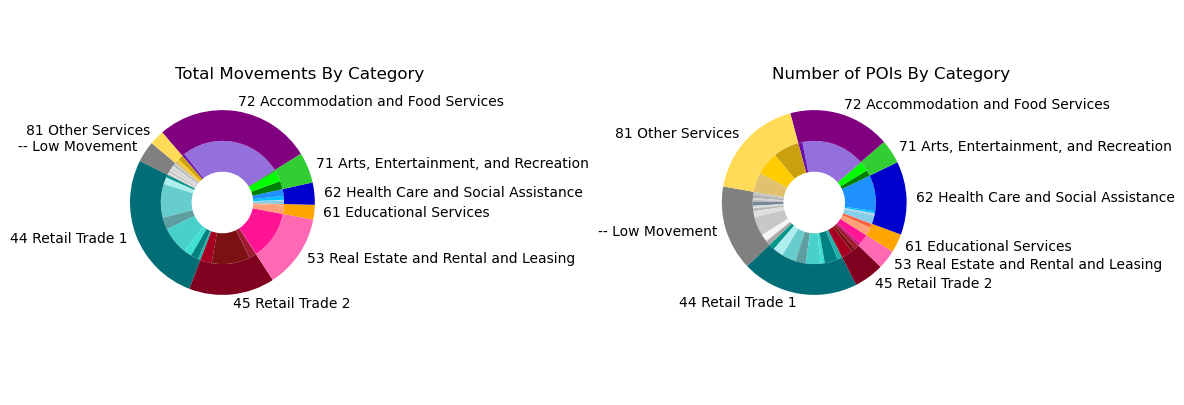

In [3]:
# Specific data for pie charts
df_pie_data = pd.read_csv('../data/piechart.csv')

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14,5))

make_piechart(
    df=df_pie_data,
    to_plot='Total Movements',
    wedgesize=0.2,
    startangle=140,
    radius=0.6,
    ax=ax[0]
    )

make_piechart(
    df=df_pie_data,
    to_plot='Number of POIs',
    wedgesize=0.2,
    startangle=170,
    radius=0.6,
    ax=ax[1]
    )

In [4]:
# Load dataframes
target_df = pd.read_csv('../data/fine.csv')
source_df = pd.read_csv('../data/coarse.csv')

print("Available aspects:\n" + "\n".join(f"'{col}'" for col in target_df.columns))

Available aspects:
'Fine Code'
'Fine Name'
'Fine Color'
'Total Movements'
'Number of POIs'
'Baseline Mean'
'Week 8 Z-score'
'Coarse Code'


In [5]:
# Get sankey data
source_nodes, target_nodes, node_widths, labels, colors, x, y = get_sankey_data(
    target_df=target_df,
    source_df=source_df,
    aspect_to_plot='Number of POIs',
    aspect_for_widths = 'Number of POIs',
    aspect_for_label_values = None,
    criss_cross=False,
    sort_ascending=False,
)

In [6]:
# Make Sankey
fig = make_sankey(source_nodes, target_nodes, node_widths, labels, colors, x, y)

# Adjust and save figure
fig.update_layout(width=1000, height=900, title='Number of POIs')
fig.write_image('../figures/sankey_pois.png') # must use write_image to save 

Sankeys are interactive; to show in GitHub save and insert (otherwise use fig.show())

![Sankey](../figures/sankey_pois.png)

# Z-scores

Use z-scores to quantify impact to movement categories during anomalous week, compared to baseline weeks.

In [7]:
# Parameters
naics_code = '622'
anomalous_week = 7
baseline_start = 1
baseline_stop = 6

# Load movement data
movement_data = load_movement_data(movement_data_folder, naics_code=naics_code)
total_movements = movement_data['Total Movements']

zscores = calculate_zscores(total_movements, baseline_start, baseline_stop)
zscores

,Baseline Mean,Baseline Std,Z-score Week 1,Z-score Week 2,Z-score Week 3,Z-score Week 4,Z-score Week 5,Z-score Week 6,Z-score Week 7,Z-score Week 8,...,Z-score Week 16,Z-score Week 17,Z-score Week 18,Z-score Week 19,Z-score Week 20,Z-score Week 21,Z-score Week 22,Z-score Week 23,Z-score Week 24,Z-score Week 25
0,21713.33,748.65,-5.39,0.41,0.43,-1.31,-1.44,1.1,0.8,-12.63,...,1.45,1.47,1.76,0.31,0.86,1.28,-1.28,0.13,-0.86,0.18


# Movement distributions

Total-movement distributions for baseline weeks and other weeks (non-baseline and non-anomaly), with the same bins. Anomalous week is a single value and doesn't have a relevant distribution value.

In [8]:
# Parameters
naics_code = '622'
anomalous_week = 7
baseline_start = 1
baseline_stop = 6

# Load movement data
movement_data = load_movement_data(movement_data_folder, naics_code=naics_code)
total_movements = movement_data['Total Movements']

# Get distributions for baseline and other weeks
bins, baseline_dist, other_dist = get_distributions(
    total_movements,
    anomalous_week,
    baseline_start,
    baseline_stop,
    number_of_bins=5)

print('\n'.join(
    f"Bin {i+1}: [{bins[i]:.1f}, {bins[i+1]:.1f}) - "
    f"Baseline: {baseline_dist[i]:.5f}, Other: {other_dist[i]:.5f}"
    for i in range(len(baseline_dist))
))
print(f'Week {anomalous_week+1} Total Movements : {total_movements[anomalous_week]}')

Bin 1: [17676.0, 18879.0) - Baseline: 0.00000, Other: 0.00005
Bin 2: [18879.0, 20082.0) - Baseline: 0.00000, Other: 0.00000
Bin 3: [20082.0, 21285.0) - Baseline: 0.00028, Other: 0.00014
Bin 4: [21285.0, 22488.0) - Baseline: 0.00042, Other: 0.00028
Bin 5: [22488.0, 23691.0) - Baseline: 0.00014, Other: 0.00037
Week 8 Total Movements : 12256.0


Text(0, 0.5, 'Total Movements')

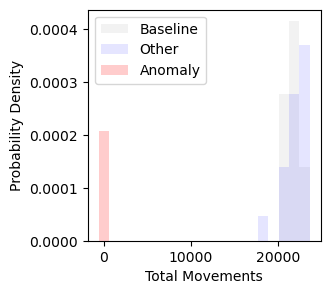

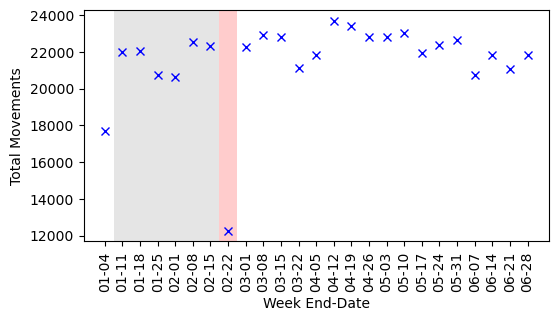

In [9]:
# Plot all distributions
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_distributions(bins, baseline_dist, other_dist, anomalous_week, ax)

# Plot total movements with shading
dates = get_dates(weekly_patterns_folder)
fig, ax = plt.subplots(1,1, figsize=(6,3))
plot_total_movements(total_movements, dates, ax)
plot_shading(anomalous_week, baseline_start, baseline_stop, ax)
ax.set_ylabel('Total Movements')

# Sankey

Use sankey diagram to see z-score ranking for coarse and fine stratefication. Criss_cross is turned on so, fine are sorted by all z-scores (not sorted separately within each coarse category).

In [10]:
# Load dataframes
target_df = pd.read_csv('../data/fine.csv')
source_df = pd.read_csv('../data/coarse.csv')

print("Available aspects:\n" + "\n".join(f"'{col}'" for col in target_df.columns))

Available aspects:
'Fine Code'
'Fine Name'
'Fine Color'
'Total Movements'
'Number of POIs'
'Baseline Mean'
'Week 8 Z-score'
'Coarse Code'


In [11]:
# Get sankey data
source_nodes, target_nodes, node_widths, labels, colors, x, y = get_sankey_data(
    target_df=target_df,
    source_df=source_df,
    aspect_to_plot= 'Week 8 Z-score',
    aspect_for_widths = 'Total Movements',
    aspect_for_label_values = 'Week 8 Z-score',
    criss_cross = True,
    sort_ascending = True,
)

In [12]:
# Finetune node placement: crisscross only and only needed for saving as .pdf
# y[8] = y[8] - 0.07 
# y[9] = y[9] - 0.036

# Make Sankey
fig = make_sankey(source_nodes, target_nodes, node_widths, labels, colors, x, y)

# Adjust and save figure
fig.update_layout(width=1000, height=900, title='Z-scores (node width is Total Movements)')
fig.write_image('../figures/sankey_zscores.png') # must use write_image to save 
# fig.show()

![Sankey](../figures/sankey_zscores.png)